In [1]:
import matplotlib.pyplot as plt 
import plots 
plots.mpltoolkit.load_mpl_presets()
import numpy as np 
import math as m
import sys 
import os 
DATA_DIR = "%sMultiDark/MDPL2/trees/" % (os.environ["DATA_DIRECTORY"]) 
FILES = ["%s%s" % (DATA_DIR, i) for i in os.listdir(DATA_DIR) if i.endswith(".out")] 

In [2]:
DATA = [np.genfromtxt(i).tolist() for i in FILES] 
print(sum([len(i) for i in DATA])) 
for i in range(len(DATA)): 
    DATA[i] = list(filter(lambda x: x[1] == -1, DATA[i])) 
print(sum([len(i) for i in DATA])) 

1254278
1113468


In [3]:
N = sum([len(i) for i in DATA]) 
print(N)

1113468


In [16]:
ids = N * [0] 
dm_over_m = N * [0] 
dspin_over_spin = N * [0] 
masses = N * [0] 
n = 0
for i in DATA: 
    for j in i: 
        dm_over_m[n] = j[5] / j[4] 
        masses[n] = j[4] 
        dspin_over_spin[n] = j[-1] / j[-2] 
        ids[n] = j[0]
        n += 1

In [5]:
def generate_ordered_subsamples(data, n): 
    indeces = np.argsort([row[0] for row in data]).tolist() 
    data = [data[i] for i in indeces] 
    x = int(len(data) / n) 
    subs = n * [None] 
    for i in range(n): 
        subs[i] = data[(x * i) : (x * (i + 1))] 
    return subs 

In [6]:
def variance(arr): 
    x = 0.68 
    arr = np.sort(arr) 
    start = int(m.floor((0.5 - x / 2) * len(arr))) 
    stop = int(m.ceil((0.5 + x / 2) * len(arr))) 
    return [arr[start], arr[stop]] 

In [22]:
def analyze(sub): 
    med_dmass = np.median([row[0] for row in sub]) 
    med_dspin = np.median([row[1] for row in sub]) 
    yerr = variance([row[1] for row in sub]) 
    return [med_dmass, med_dspin, yerr[0], yerr[1]] 

def mass_range(data, minlogm, maxlogm, nbins = 100): 
    filtered = list(filter(lambda x: minlogm <= m.log10(x[2]) <= maxlogm, data)) 
    ordered = generate_ordered_subsamples(filtered, nbins) 
    x = len(ordered) * [0] 
    y = len(ordered) * [0] 
    low = len(ordered) * [0] 
    high = len(ordered) * [0] 
    for i in range(len(ordered)): 
        x[i], y[i], low[i], high[i] = analyze(ordered[i]) 
    return [x, y, low, high] 

In [17]:
data = [list(i) for i in zip(dm_over_m, dspin_over_spin, masses, ids)]

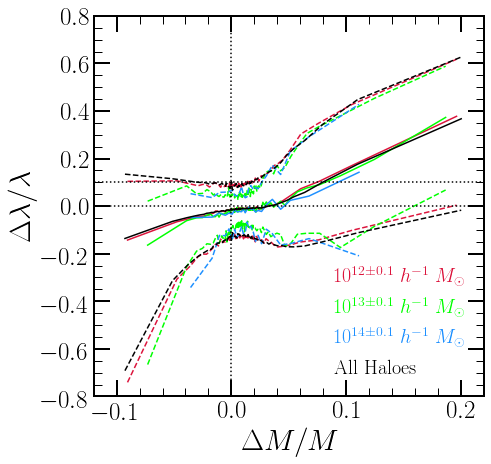

In [49]:
fig = plt.figure(figsize= (7, 7)) 
ax = fig.add_subplot(111, facecolor = "white") 
ax.set_xlabel(r"$\Delta M / M$") 
ax.set_ylabel(r"$\Delta\lambda/\lambda$") 
ax.set_xlim([-0.12, 0.22]) 
ax.set_ylim([-0.8, 0.8]) 
ax.yaxis.set_ticks(np.linspace(-0.8, 0.8, 9)) 
colors = ["crimson", "lime", "dodgerblue", "black"] 
labels = [r"$10^{12\pm0.1}\ h^{-1}\ M_\odot$", 
         r"$10^{13\pm0.1}\ h^{-1}\ M_\odot$", 
         r"$10^{14\pm0.1}\ h^{-1}\ M_\odot$", 
         "All Haloes"]
for i in range(len(colors)): 
    if i == 2: 
        nbins = 25 
    else: 
        nbins = 100 
    x, y, low, high = mass_range(data, [11.9, 12.9, 13.9, 1][i], [12.1, 13.1, 14.1, 100][i], nbins = nbins)  
    ax.plot(x, y, c = plots.mpltoolkit.named_colors()[colors[i]], label = labels[i])  
    ax.plot(x, low, c = plots.mpltoolkit.named_colors()[colors[i]], linestyle = '--') 
    ax.plot(x, high, c = plots.mpltoolkit.named_colors()[colors[i]], linestyle = '--') 
ax.plot(ax.get_xlim(), 2 * [0], c = plots.mpltoolkit.named_colors()["black"], linestyle = ':') 
ax.plot(ax.get_xlim(), 2 * [0.1], c = plots.mpltoolkit.named_colors()["black"], linestyle = ':') 
ax.plot(2 * [0], ax.get_ylim(), c = plots.mpltoolkit.named_colors()["black"], linestyle = ':') 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 20) 
for i in range(4): 
    leg.get_texts()[i].set_color(colors[i])  